In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from vc_sample.density_estimation import KernelDensityEstimator, Kernel, epanechnikov, kernel_scale_factor
from vc_sample.void_and_cluster import VoidAndCluster
from vc_sample import spectral_analysis

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Sampling in 1D

In [4]:
xs = np.linspace(0.0, 10.0, 100)
points = xs.reshape(-1, 1)

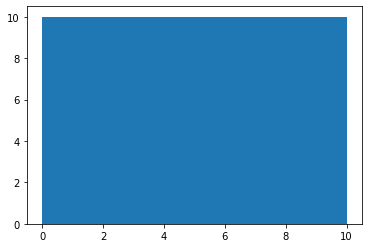

In [5]:
plt.hist(xs);

In [6]:
num_samples = 30

kernel_scale1d = 0.3 * kernel_scale_factor(dimensionality=1, num_points=100, num_samples=num_samples)
kernel_scale1d

1.0

In [7]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_scale1d))
vc = VoidAndCluster(points, density_estimator, num_initial_samples=10)

samples = vc.sample(size=num_samples)

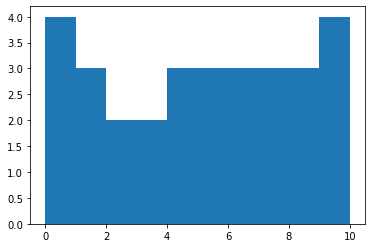

In [8]:
plt.hist(samples);

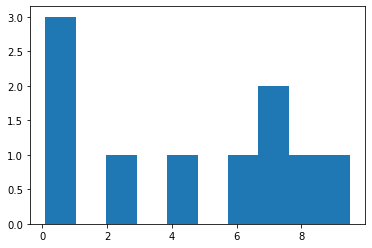

In [9]:
random_samples = np.random.choice(xs, replace=False, size=10)

plt.hist(random_samples);

## Sampling in 2D

In [87]:
num_points = 1000
xs = np.random.uniform(-1.0, 1.0, num_points)
ys = np.random.uniform(-1.0, 1.0, num_points)
points = np.stack([xs, ys]).T

In [108]:
kernel_bandwidth = 0.05 * kernel_scale_factor(dimensionality=2, num_points=num_points, num_samples=100)
kernel_bandwidth

0.158113883008419

In [117]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_bandwidth))
vc = VoidAndCluster(points, density_estimator, num_initial_samples=50)

samples = vc.sample(size=100)

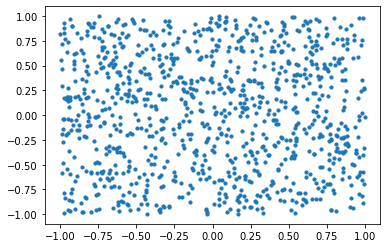

In [126]:
plt.scatter(x=points[:,0], y=points[:,1], s=10);

Not surprisingly, a spectral analysis using the Fourier transform does not show any structure in the data

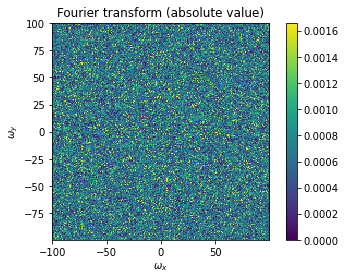

In [127]:
img_full = spectral_analysis.discretize_as_image(xs=points[:,0], ys=points[:,1], resolution=(200, 200))
spectral_analysis.plot_fourier_transform(img_full);

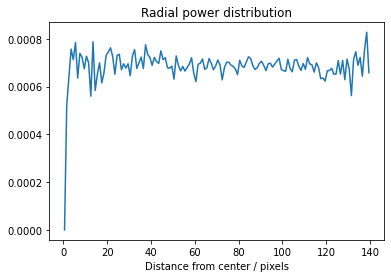

In [128]:
spectral_analysis.plot_power_distribution(img_full);

### Sampled Points

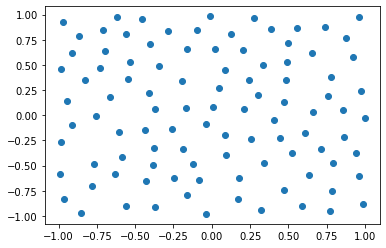

In [129]:
plt.scatter(x=samples[:,0], y=samples[:,1]);

Spectral analysis reveals _blue noise_, i.e. low frequencies have low energy (blue region in the Fourier transform plot)

In [130]:
img_sampled = spectral_analysis.discretize_as_image(xs=samples[:,0], ys=samples[:,1], resolution=(200, 200))

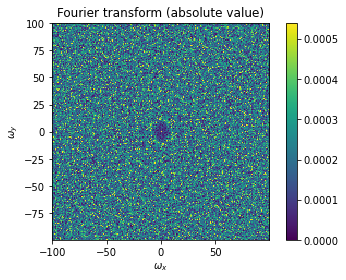

In [131]:
spectral_analysis.plot_fourier_transform(img_sampled);

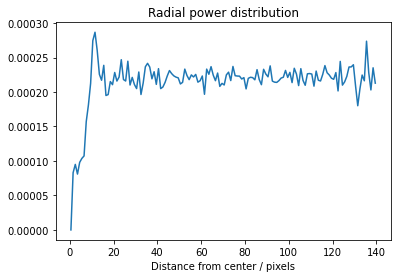

In [132]:
spectral_analysis.plot_power_distribution(img_sampled);

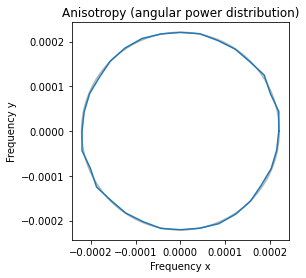

In [133]:
spectral_analysis.plot_anisotropy(img_sampled);

## Sampling a noisy sinus in 2D

In [286]:
num = 1000
num_samples = 200

ys = np.sin(np.linspace(-3.0, 3.0, num)) + np.random.normal(loc=0, scale=0.4, size=num)
xs = np.linspace(-3.0, 3.0, num)
points = np.stack([xs, ys]).T

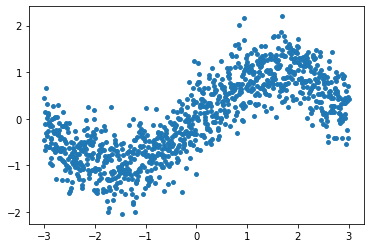

In [292]:
plt.scatter(xs, ys, s=15);

In [323]:
kernel_bandwidth = 0.1 * kernel_scale_factor(dimensionality=2, num_points=num_points, num_samples=num_samples)
kernel_bandwidth

0.223606797749979

In [324]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_bandwidth))

The sampling strategy keeps the original density of the data

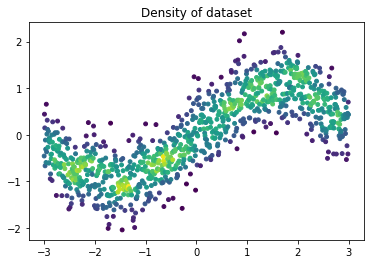

In [325]:
density = density_estimator.estimate()

plt.title('Density of dataset')
plt.scatter(xs, ys, c=density, s=15);

In [326]:
vc = VoidAndCluster(points, density_estimator, num_initial_samples=50)
samples = vc.sample(size=num_samples)

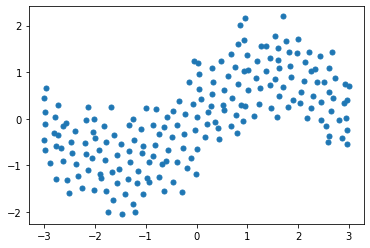

In [327]:
plt.scatter(x=samples[:,0], y=samples[:,1], s=25);

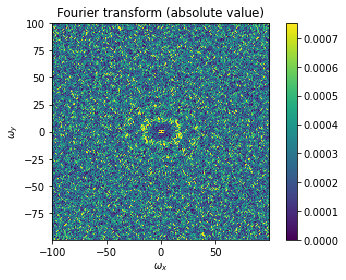

In [305]:
img_sampled = spectral_analysis.discretize_as_image(xs=samples[:,0], ys=samples[:,1], resolution=(200, 200))
spectral_analysis.plot_fourier_transform(img_sampled);